In [1]:
# Input Values

optimize = "volume"

sourceBoard = {
  "width": 1500,
  "height": 1500,
  "thickness": 15
}

saw_width = 3

In [2]:
# Initial Values (todo - estimate from source board)
initial_cupboard_dimensions = {
  "width": 600, # 
  "height": 400,
  "depth": 380
}

In [3]:
# 2 long Side Panels
sidePanel_long_dimensions = {
  "width": initial_cupboard_dimensions["depth"],
  "height": initial_cupboard_dimensions["height"] - sourceBoard["thickness"] * 2,
  "thickness": sourceBoard["thickness"],
  "name": "sidePanel_long"
}

# 2 short Side Panels
sidePanel_short_dimensions = {
  "width": initial_cupboard_dimensions["width"] - sourceBoard["thickness"] * 2,
  "height": initial_cupboard_dimensions["height"] - sourceBoard["thickness"] * 2,
  "thickness": sourceBoard["thickness"],
  "name": "sidePanel_short"
}

# 2 Top and Bottom Panels
topBottomPanel_dimensions = {
  "width": initial_cupboard_dimensions["width"],
  "height": initial_cupboard_dimensions["depth"], 
  "thickness": sourceBoard["thickness"],
  "name": "topBottomPanel"
}

In [4]:
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np

In [11]:
# Panels
panels = [
    sidePanel_long_dimensions, sidePanel_long_dimensions, sidePanel_short_dimensions, sidePanel_short_dimensions, topBottomPanel_dimensions, topBottomPanel_dimensions
]

# Add id to each panel
for i, panel in enumerate(panels):
    panel["id"] = f"{panel['width']}_{panel['height']}"

In [14]:
# Generate all possible variations of panel orders
from itertools import permutations
panel_orders = list(permutations(panels))

print(f"Number of panel orders: {len(panel_orders)}")

known_ids = []
unique_panel_orders = []

# Generate ids for each panel order
for i, panel_order in enumerate(panel_orders):
    id = ""
    for panel in panel_order:
        id += f"{panel['id']}_"
    id = id[:-1]

    # Check if id is unique
    if not id in known_ids:
        known_ids.append(id)
        unique_panel_orders.append(panel_order)

print(f"Number of unique panel orders: {len(known_ids)}")


Number of panel orders: 720
Number of unique panel orders: 90


Placed topBottomPanel at (0, 0)
Placed topBottomPanel at (603, 0)
Placed sidePanel_short at (0, 383)
Placed sidePanel_short at (573, 383)
Placed sidePanel_long at (0, 756)
Placed sidePanel_long at (383, 756)


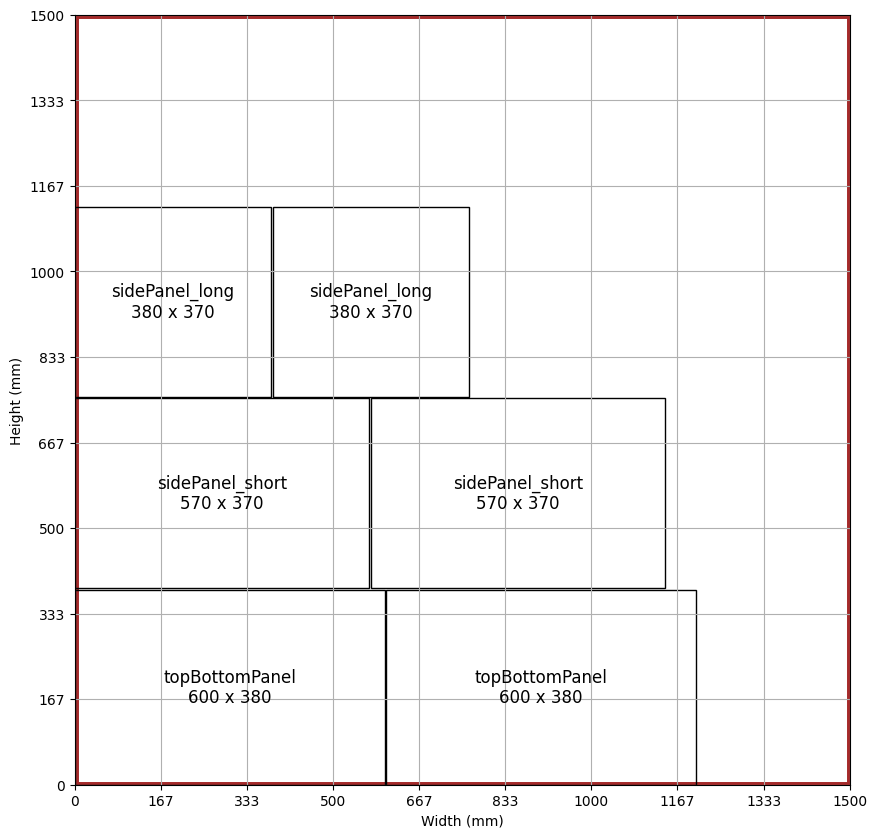

In [43]:
# Draw panels all in one figure
fig, ax = plt.subplots(figsize=(10,10))

placedPanels = []

# Order panels by area
panels.sort(key=lambda x: x["width"] * x["height"], reverse=True)

# Draw the source board
ax.add_patch(
    patches.Rectangle(
        (0, 0),   # (x,y)
        sourceBoard["width"],          # width
        sourceBoard["height"],          # height
        edgecolor="brown",
        facecolor="None",
        linewidth=5
    )
)

for panel in panels:

    panel = panel.copy()

    # Find a place for the panel
    x = 0
    y = 0
    
    while True:
        # Check if panel fits in the source board
        if x + panel["width"] <= sourceBoard["width"] and y + panel["height"] <= sourceBoard["height"]:
            # Check if panel intersects with any of the placed panels
            intersects = False
            for placedPanel in placedPanels:
                if (x < placedPanel["x"] + placedPanel["width"] + saw_width and
                    x + panel["width"] + saw_width > placedPanel["x"] and
                    y < placedPanel["y"] + placedPanel["height"] + saw_width and
                    y + panel["height"] + saw_width > placedPanel["y"]):
                    intersects = True
                    break
            if not intersects:
                break
        x += 1
        if x >= sourceBoard["width"]:
            x = 0
            y += 1
            if y >= sourceBoard["height"]:
                print(f'Could not place {panel["name"]}!')
                break


    # Place the panel
    ax.add_patch(
        patches.Rectangle(
            (x, y),   # (x,y)
            panel["width"],          # width
            panel["height"],          # height
            edgecolor="black",
            facecolor="None",
            linewidth=1
        )
    )

    # Save panel position
    panel["x"] = x
    panel["y"] = y

    print(f'Placed {panel["name"]} at ({x}, {y})')

    # Save panel in placed panels
    placedPanels.append(panel)

    # Write name of panel
    ax.text(x + panel["width"] / 2, y + panel["height"] / 2, f'{panel["name"]}\n{panel["width"]} x {panel["height"]}', horizontalalignment='center', verticalalignment='center', fontsize=12)

# Set axis limits
ax.set_xlim(0, sourceBoard["width"])
ax.set_ylim(0, sourceBoard["height"])

# Set axis labels
ax.set_xlabel('Width (mm)')
ax.set_ylabel('Height (mm)')

# Set axis ticks
ax.set_xticks(np.linspace(0, sourceBoard["width"], 10))
ax.set_yticks(np.linspace(0, sourceBoard["height"], 10))

# Set grid
ax.grid()

# Show the figure
plt.show()

In [44]:
interior_volume = (initial_cupboard_dimensions["width"] - sourceBoard["thickness"] * 2) * (initial_cupboard_dimensions["depth"] - sourceBoard["thickness"] * 2) * (initial_cupboard_dimensions["height"] - sourceBoard["thickness"] * 2)
print("Interior volume: " + str(interior_volume) + " mm^3")

area_sum = sum([panel["width"] * panel["height"] for panel in panels])
print("Area sum: " + str(area_sum) + " mm^2")

given_area = sourceBoard["width"] * sourceBoard["height"]
print("Given area: " + str(given_area) + " mm^2")

print("Waste: " + str(given_area - area_sum) + " mm^2")

print("Waste percentage: " + str((given_area - area_sum) / given_area * 100) + "%")

Interior volume: 73815000 mm^3
Area sum: 1159000 mm^2
Given area: 2250000 mm^2
Waste: 1091000 mm^2
Waste percentage: 48.48888888888889%
